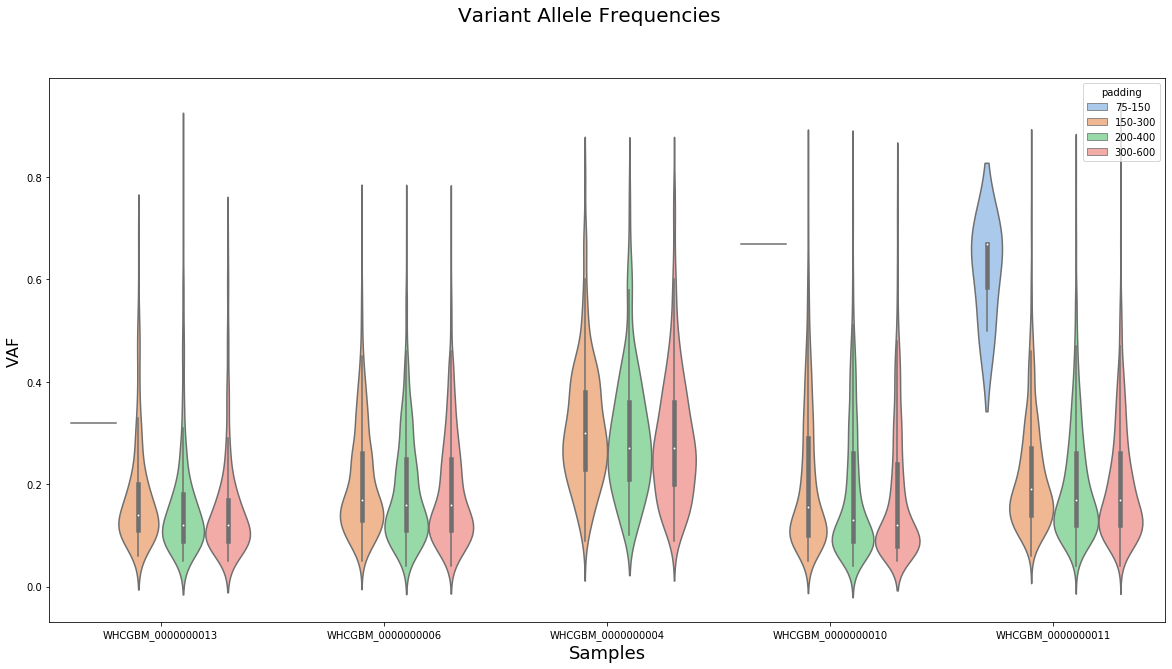

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading file that has samplename, BED file with tumor sample and padding value
inputfiles = open("/Users/kogantit/Documents/git_repos/canine-dev/analyses/lancet_padding_window/inputs/all_samples_bedfiles.txt", "r")
inlines = inputfiles.readlines()

# Starting a new dataframe that will have samplename, VAF value and padding
col_names =  ['sample', 'vaf', 'padding']
vaf_df  = pd.DataFrame(columns = col_names)

# Reading in file with BED files
for line in inlines:
    sample=line.split()[0]
    filename=line.split()[1]
    padding=line.split()[2]
    #Reading every BED file to calculate variant allele frequency
    with open(filename, "r") as bedlines:
        for bedline in bedlines:
            bedline=bedline.split()
            #print(bedline)
            if(bedline[7].split(":")[0])=="0/1":
                alt_dp=bedline[7].split(":")[1].split(",")[1]
                total_dp=bedline[7].split(":")[2]
                vaf=round(int(alt_dp)/int(total_dp),2)
                # Adding sample, vaf and padding to new dataframe
                new_row = pd.DataFrame({'sample': sample, 'vaf': vaf, 'padding': padding}, index=[0])
                vaf_df = pd.concat([new_row, vaf_df])
                
# vaf_df is a dataframe shoudl have VFA for all samples at all padding
        
# Creating violin plots using the dataframe above
# Violin plots are clustered per sample and colored based on padding 
fig=plt.figure(figsize=(20,10))
sns.violinplot(x="sample", y="vaf", hue="padding",
               palette="pastel", data=vaf_df)
fig.suptitle('Variant Allele Frequencies', fontsize=20)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('VAF', fontsize=16)
fig.savefig('results/variant_allele_frequencies.png')            




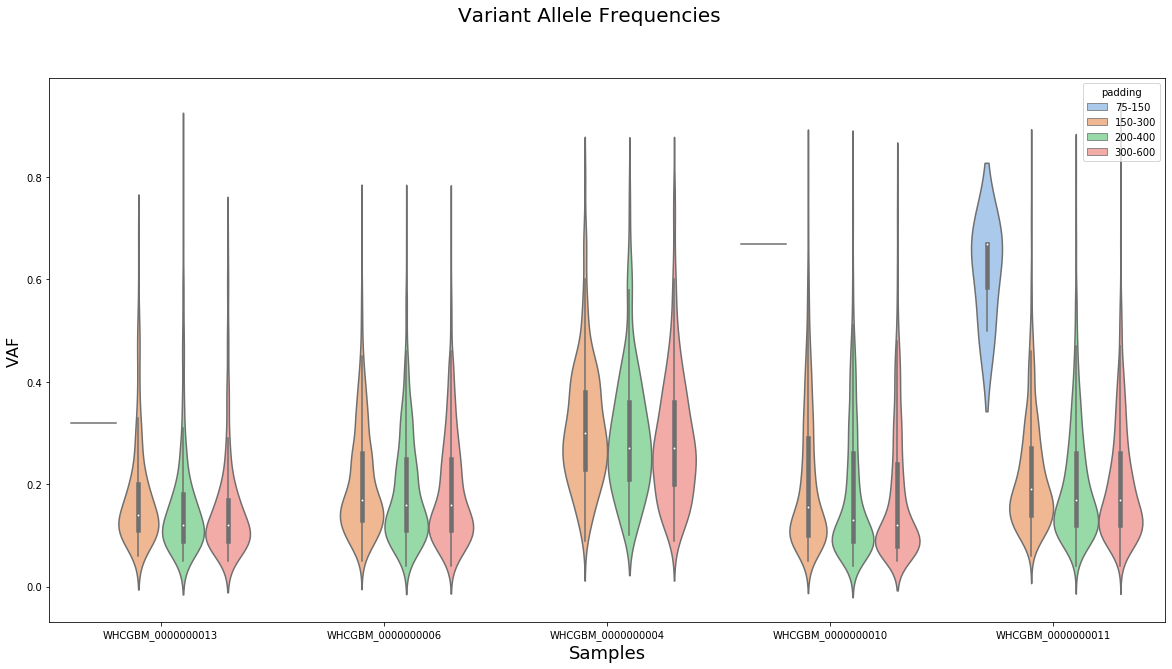

In [70]:
fig=plt.figure(figsize=(20,10))
sns.violinplot(x="sample", y="vaf", hue="padding",
               palette="pastel", data=vaf_df)
fig.suptitle('Variant Allele Frequencies', fontsize=20)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('VAF', fontsize=16)
fig.savefig('../results/variant_allele_frequencies.png')